<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/DSPT6_LS_DS_412_Vector_Representations_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 1, Module 2*

---

# Vector Representations (Prepare)


As we learned yesterday, machines cannot interpret raw text. We need to transform that text into something we/machines can more readily analyze. Yesterday, we did simple counts of counts to summarize the content of Amazon reviews. Today, we'll extend those concepts to talk about vector representations such as Bag of Words (BoW) and word embedding models. We'll use those representations for search, visualization, and prepare for our classification day tomorrow. 

Processing text data to prepare it for machine learning models often means translating the information from documents into a numerical format. Bag-of-Words approaches (sometimes referred to as Frequency-Based word embeddings) accomplish this by "vectorizing" tokenized documents. This is done by representing each document as a row in a DataFrame and creating a column for each unique word in the corpora (group of documents). The presence or lack of a given word in a document is then represented either as a raw count of how many times a given word appears in a document (CountVectorizer) or as that word's TF-IDF score (TfidfVectorizer).

On the python side, we will be focusing on `sklearn` and `spacy` today.  

## Case Study

We're going to pretend we're on the datascience team at the BBC. We want to recommend articles to visitors to on the BBC website based on the article they just read. Our team wants 

**Dataset:**

[D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.](http://mlg.ucd.ie/datasets/bbc.html)
*Please note that the dataset has been sampled down to tech articles only.* 

## Learning Objectives
* <a href="#p1">Part 1</a>: Represent a document as a vector
* <a href="#p2">Part 2</a>: Query Documents by Similarity
* <a href="#p3">Part 3</a>: Apply word embedding models to create document vectors

# Represent a document as a vector (Learn)
<a id="p1"></a>

## Overview

In this section, we are going to create Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things. The most traditional: counts of appearances of words, does the word appear at all (binary), and term-frequency inverse-document frequency (TF-IDF). 

**Discussion:** Don't we loose all the context and grammar if we do this? So Why does it work?

## Follow Along

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

In [ ]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

**Warm Up (_3 Minutes_)**

Extract the tokens from this sentence using Spacy. Text is from [OpenAI](https://openai.com/blog/better-language-models/)

In [ ]:
text = "We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."

In [ ]:
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', 'similar', 'dataset', 'CommonCrawl']


In [ ]:
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git

Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1464, done.
remote: Total 1464 (delta 0), reused 0 (delta 0), pack-reused 1464
Receiving objects: 100% (1464/1464), 55.27 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [ ]:
!mv DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data .

In [ ]:
import os 
from glob import glob

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
  
    returns list of strings 
    """
    data = []
    files = glob(filefolder + "/*.txt")
    for article in files:     
        with open(article, 'rb') as f:
            data.append(f.read())
    return data

In [ ]:
data = gather_data('./data')

In [ ]:
len(data)

401

In [ ]:
data[0]

b'Slow start to speedy net services\n\nFaster broadband in the UK is becoming a reality as more internet providers offer super-fast services.\n\nSome lucky Britons can already take advantage of UK Online\'s 8 megabits per second service, which was launched in November 2004. BT Retail has announced that it will trial the same speed service, with a national rollout by year end. Other service providers are expected to follow suit and a glut of new voice and video services will follow.\n\n"If the bandwidth is there then ISPs will buy it," said Jill Finger, a research director at analyst firm IDC. Others will be watching BT Retail\'s trials, which is initially for employees and later in the summer for customers, with interest. For BT Retail, she said, the super-fast service could be a way of differentiating it from other players. "It has been losing market share and this could be one way of gaining some of that back," said Ms Finger. Wanadoo is set to trial an 8Mbps service in the summer an

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text_list = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.",
        "In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.",
        "This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text_list)

# transform text
dtm = vect.transform(text_list)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [ ]:
print(dtm)

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [ ]:
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [ ]:
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


In [ ]:
text_list[0][:50]

'We created a new dataset which emphasizes diversit'

In [ ]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,as,at,be,been,by,can,commoncrawl,content,created,curated,data,dataset,datasets,diversity,document,educational,emphasizes,filtered,for,found,from,funny,have,heuristic,higher,humans,in,indicator,interesting,internet,karma,leading,least,link,links,new,of,only,or,order,other,outbound,pages,preserve,quality,received,reddit,scraping,similar,specifically,such,than,the,this,thought,to,used,users,we,whether,which
0,0,0,0,0,1,0,0,2,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,2,0,2,0,2
2,2,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,1,0,2,0


In [ ]:
data[0][:200]

b"Slow start to speedy net services\n\nFaster broadband in the UK is becoming a reality as more internet providers offer super-fast services.\n\nSome lucky Britons can already take advantage of UK Online's "

In [ ]:
len(data)

401

**Three Minute Challenge:** 
* Apply CountVectorizer to our BBC Data
* Store results in a dataframe called `dtm`
* Extra Challenge - Try to Customize CountVectorizer with Spacy Processing

In [ ]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [ ]:
dtm.head()

,000,10,100,11,12,14,15,18,20,200,2003,2004,2005,2006,25,30,3d,3g,40,50,500,60,80,ability,able,access,according,account,accounts,act,action,activity,actually,add,added,address,addresses,advantage,age,ago,...,wanted,wants,warned,warning,wars,watch,watching,way,ways,web,website,websites,week,weeks,went,wi,wide,widely,win,windows,wireless,women,won,word,words,work,worked,working,works,world,worldwide,worm,worth,writing,xbox,xp,yahoo,year,years,york
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
doc_len = [len(doc) for doc in data]

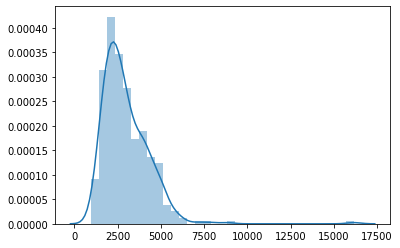

In [ ]:
import seaborn as sns

sns.distplot(doc_len);

### TfidfVectorizer

## Term Frequency - Inverse Document Frequency (TF-IDF)

<center><img src="https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336" width="300"></center>

Term Frequency: Percentage of words in document for each word

Document Frequency: A penalty for the word existing in a high number of documents.

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(max_features=500)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,12,20,2003,2004,2005,30,3g,50,able,about,access,according,across,action,added,after,against,all,allow,almost,already,also,although,always,among,an,analysts,and,announced,another,anti,any,apple,are,around,as,at,...,very,via,video,virus,viruses,voice,want,was,watch,way,ways,we,web,website,websites,week,well,were,what,when,where,which,while,who,will,windows,wireless,with,without,work,working,world,would,xbox,yahoo,year,years,yet,you,your
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.058728,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.048781,0.0,0.000000,0.000000,0.0,0.000000,0.037175,0.0,0.0,0.053651,0.062462,0.0,0.0,0.0,0.060854,0.0,0.160974,0.071869,0.000000,0.000000,0.000000,0.0,0.077956,0.000000,0.051453,0.084083,...,0.000000,0.000000,0.102369,0.0,0.0,0.081923,0.0,0.030826,0.0,0.082187,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.113546,0.000000,0.000000,0.184472,0.0,0.000000,0.077372,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.039989,0.0,0.0,0.000000,0.000000
1,0.038769,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042812,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.052148,0.000000,0.0,0.0,0.000000,0.024821,0.0,0.0,0.0,0.000000,0.0,0.164486,0.000000,0.048245,0.054965,0.000000,0.0,0.082607,0.000000,0.040892,0.022275,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.024499,0.0,0.000000,0.000000,0.000000,0.044641,0.0,0.050222,0.0,0.0,0.000000,0.035344,0.000000,0.000000,0.022560,0.000000,0.000000,0.024435,0.0,0.000000,0.061492,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.031782,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.06975,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.022682,0.0,0.0,0.032734,0.038110,0.0,0.0,0.0,0.037129,0.0,0.168369,0.000000,0.000000,0.000000,0.000000,0.0,0.110982,0.030647,0.062786,0.102604,...,0.062458,0.036682,0.031229,0.0,0.0,0.000000,0.0,0.000000,0.0,0.025073,0.040487,0.073637,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.049240,0.035998,0.034639,0.000000,0.050765,0.000000,0.0,0.042197,0.062943,0.0,0.000000,0.038161,0.055169,0.043367,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.053838,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.025899,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.027848,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.223950,0.000000,0.000000,0.000000,0.000000,0.0,0.077865,0.037628,0.019272,0.020996,...,0.191716,0.045038,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.030784,0.049710,0.090412,0.042078,0.0,0.000000,0.0,0.0,0.028088,0.000000,0.030228,0.088396,0.042530,0.000000,0.062329,0.000000,0.0,0.000000,0.038641,0.0,0.000000,0.093707,0.067737,0.000000,0.0,0.0,0.000000,0.0,0.0,0.222461,0.046382
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.054788,0.00000,0.038653,0.0,0.108276,0.043573,0.0,0.000000,0.029456,0.0,0.0,0.000000,0.049493,0.0,0.0,0.0,0.048219,0.0,0.200437,0.000000,0.000000,0.000000,0.081737,0.0,0.144130,0.000000,0.122308,0.066625,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.024425,0.0,0.032561,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.067478,0.042003,0.032964,0.000000,0.0,0.000000,0.040872,0.0,0.079014,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.156870,0.000000


In [ ]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

text data machines

"text data" "data machines" "text machines"

In [ ]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_features=400,
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,10,100,12,2,20,2003,2004,2005,3,3 g,30,able,access,accord,account,action,add,address,aim,allow,analyst,announce,anti,anti virus,appear,apple,area,ask,attack,audience,available,away,base,bbc,bbc news,believe,big,billion,blog,...,text,thing,think,time,title,tool,track,traffic,try,turn,tv,type,uk,use,user,version,video,video game,virus,voice,want,warn,watch,way,web,website,week,wi,wi fi,win,window,windows,wireless,work,world,write,xbox,yahoo,year,£
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.069666,0.0,0.0,0.0,0.0,0.000000,0.000000,0.057866,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.07308,0.080092,0.000000,0.0,0.0,0.0,0.000000,0.077837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.047015,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.112108,0.000000,0.000000,0.0,0.120065,0.0,0.0,0.093102,0.000000,0.0,0.081541,0.090771,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.041925,0.0
1,0.057551,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.062985,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.046089,0.0,0.0,...,0.0,0.0,0.045576,0.000000,0.0,0.0,0.0,0.0,0.000000,0.059103,0.0,0.0,0.000000,0.000000,0.147887,0.0,0.000000,0.0,0.0,0.000000,0.040501,0.0,0.000000,0.000000,0.051155,0.040501,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.032187,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.110398,0.000000,0.0,0.000000,0.047163,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.069410,0.000000,0.0,0.0,0.056654,0.065036,0.238322,0.050926,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.192971,0.0,0.0,0.000000,0.073903,0.160950,0.0,0.050160,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.075843,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.068549,0.039995,0.089031,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.088922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.079428,0.134077,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.084297,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.061849,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.047709,0.0,0.0,0.0,0.0,0.068204,0.000000,0.0,0.0,0.000000,0.134632,0.048868,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.092111,0.067615,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145721,0.108127,0.168595,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.051951,0.0,0.140544,0.050676,0.0,0.000000,0.059311,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.084418,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.079408,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.073206,0.040746,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.085949,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
dtm.shape

(401, 400)

## Challenge

During this module's project assignment, you will transform data science job listings to vector representations for analysis downstream. 

# Query Documents by Similarity (Learn)
<a id="p2"></a>

## Overview

Have you ever considered how a search bar works? You may just think that search bars simply match your input text againist the documents. While there are many different mechanisms for the 'match', one of the most classic is to search by similarity. We will apply n-dimensional distance to measure similarity, and query for input and output. 

## Follow Along

### Cosine Similarity (Brute Force)

In [ ]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [ ]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [ ]:
# Our Similarity Matrix is ? size 
df.shape

(401, 401)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.006715,0.067884,0.074249,0.059173,0.109894,0.086870,0.196204,0.079764,0.045641,0.041124,0.145378,0.177970,0.052897,0.092157,0.056782,0.099690,0.060972,0.050482,0.214278,0.199958,0.106609,0.094176,0.110418,0.054010,0.110418,0.076542,0.088581,0.020089,0.071054,0.349243,0.060312,0.067155,0.059393,0.192460,0.045844,0.050088,0.081059,0.091467,0.085201,...,0.045297,0.064844,0.050482,0.052355,0.095394,0.044806,0.083191,0.055674,0.037000,0.164124,0.097470,0.078694,0.177970,0.055871,0.154780,0.109595,0.485834,0.109634,0.088508,0.094679,0.060421,0.055992,0.066834,0.079992,0.099043,0.071419,0.025271,0.033486,0.145137,0.187522,0.050555,0.093780,0.025536,0.128052,0.070612,0.018815,0.077775,0.147800,0.026166,0.041778
1,0.006715,1.000000,0.139225,0.064381,0.181137,0.073105,0.095164,0.041614,0.016592,0.108381,0.094765,0.059918,0.075522,0.041270,0.117390,0.021338,0.104190,0.122376,0.025205,0.089988,0.061515,0.072772,0.025729,0.034413,0.056989,0.034413,0.063263,0.062108,0.248523,0.079904,0.037790,0.087469,0.100985,0.056218,0.134790,0.203549,0.177702,0.108184,0.044482,0.090713,...,0.038423,0.065719,0.025205,0.034257,0.166973,0.076554,0.011495,0.163609,0.017416,0.078028,0.064430,0.100552,0.075522,0.039020,0.061201,0.116417,0.033920,0.073052,0.040320,0.074773,0.135011,0.056830,0.156937,0.176331,0.133146,0.066977,0.138564,0.054763,0.042365,0.073969,0.040164,0.085587,0.118850,0.071001,0.060178,0.212530,0.108324,0.128856,0.033171,0.112715
2,0.067884,0.139225,1.000000,0.182889,0.126001,0.236147,0.109736,0.153763,0.098486,0.136748,0.131429,0.095411,0.056784,0.063436,0.133937,0.053353,0.204636,0.117815,0.146956,0.117778,0.230355,0.158270,0.125916,0.159612,0.112399,0.159612,0.136496,0.100097,0.107100,0.212100,0.118289,0.161026,0.155101,0.036026,0.166384,0.293856,0.104363,0.085971,0.234287,0.167904,...,0.048990,0.120726,0.146956,0.054210,0.185844,0.048735,0.147115,0.213020,0.163766,0.142069,0.113361,0.134001,0.056784,0.233692,0.100655,0.133762,0.121077,0.121119,0.084895,0.089313,0.101436,0.194332,0.307543,0.094546,0.390342,0.077436,0.193279,0.085836,0.059248,0.250478,0.180279,0.124729,0.239842,0.101814,0.084891,0.060021,0.168892,0.256423,0.066075,0.102405
3,0.074249,0.064381,0.182889,1.000000,0.274958,0.081766,0.099339,0.142589,0.041086,0.146521,0.061989,0.123018,0.088245,0.065846,0.188821,0.037218,0.112157,0.079510,0.077028,0.103293,0.133340,0.290247,0.088672,0.045409,0.091811,0.045409,0.106551,0.140448,0.140628,0.210209,0.057782,0.083099,0.118885,0.032852,0.105905,0.165882,0.088164,0.041048,0.075261,0.125713,...,0.086713,0.111615,0.077028,0.057350,0.044531,0.073111,0.068160,0.124318,0.027153,0.052449,0.037095,0.132274,0.088245,0.064939,0.116728,0.066948,0.070009,0.060833,0.114417,0.106492,0.258749,0.099645,0.317455,0.073010,0.172528,0.126134,0.274365,0.044667,0.059090,0.243249,0.153505,0.109170,0.071178,0.158104,0.077447,0.094545,0.132181,0.189607,0.108182,0.083267
4,0.059173,0.181137,0.126001,0.274958,1.000000,0.107094,0.049163,0.044633,0.184134,0.146274,0.070410,0.092675,0.062741,0.081485,0.243688,0.023059,0.107673,0.193022,0.046211,0.068541,0.083372,0.085461,0.050762,0.052916,0.067256,0.052916,0.068461,0.104792,0.185020,0.078435,0.097436,0.030615,0.180598,0.038830,0.077202,0.189607,0.122017,0.093238,0.036858,0.056413,...,0.043345,0.074406,0.046211,0.023865,0.155277,0.100610,0.045664,0.215739,0.040641,0.106051,0.072985,0.086809,0.062741,0.106688,0.103325,0.085585,0.042567,0.162230,0.084974,0.127221,0.226219,0.093388,0.236273,0.153818,0.179282,0.057822,0.180097,0.066246,0.065921,0.167723,0.060028,0.133893,0.106988,0.114784,0.080196,0.111645,0.256321,0.142676,0.032467,0.258848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
data[0][:200]

b"Slow start to speedy net services\n\nFaster broadband in the UK is becoming a reality as more internet providers offer super-fast services.\n\nSome lucky Britons can already take advantage of UK Online's "

In [ ]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.006715
2    0.067884
3    0.074249
4    0.059173
Name: 0, dtype: float64

In [ ]:
# Grab the row
df[df[15] < 1][15].sort_values(ascending=False)[:5]

56     0.478621
33     0.478621
49     0.437499
129    0.434394
351    0.419864
Name: 15, dtype: float64

In [ ]:
print(data[15][:200])

b"2D Metal Slug offers retro fun\n\nLike some drill sergeant from the past, Metal Slug 3 is a wake-up call to today's gamers molly-coddled with slick visuals and fancy trimmings.\n\nWith its hand-animated s"


In [ ]:
print(data[49][:200])

b"Halo fans' hope for sequel\n\nXbox video game Halo 2 has been released in the US on 9 November, with a UK release two days later. Why is the game among the most anticipated of all time?\n\nHalo is conside"


### NearestNeighbor (K-NN) 

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large data.

To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

With this setup, a single distance calculation between a test point and the centroid is sufficient to determine a lower and upper bound on the distance to all points within the node. Because of the spherical geometry of the ball tree nodes, it can out-perform a KD-tree in high dimensions, though the actual performance is highly dependent on the structure of the training data. In scikit-learn, ball-tree-based neighbors searches are specified using the keyword algorithm = 'ball_tree', and are computed using the class sklearn.neighbors.BallTree. Alternatively, the user can work with the BallTree class directly.

In [ ]:
dtm.head()

,$,10,100,12,2,20,2003,2004,2005,3,3 g,30,able,access,accord,account,action,add,address,aim,allow,analyst,announce,anti,anti virus,appear,apple,area,ask,attack,audience,available,away,base,bbc,bbc news,believe,big,billion,blog,...,text,thing,think,time,title,tool,track,traffic,try,turn,tv,type,uk,use,user,version,video,video game,virus,voice,want,warn,watch,way,web,website,week,wi,wi fi,win,window,windows,wireless,work,world,write,xbox,yahoo,year,£
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.069666,0.0,0.0,0.0,0.0,0.000000,0.000000,0.057866,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.07308,0.080092,0.000000,0.0,0.0,0.0,0.000000,0.077837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.047015,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.112108,0.000000,0.000000,0.0,0.120065,0.0,0.0,0.093102,0.000000,0.0,0.081541,0.090771,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.041925,0.0
1,0.057551,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.062985,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.046089,0.0,0.0,...,0.0,0.0,0.045576,0.000000,0.0,0.0,0.0,0.0,0.000000,0.059103,0.0,0.0,0.000000,0.000000,0.147887,0.0,0.000000,0.0,0.0,0.000000,0.040501,0.0,0.000000,0.000000,0.051155,0.040501,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.032187,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.110398,0.000000,0.0,0.000000,0.047163,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.069410,0.000000,0.0,0.0,0.056654,0.065036,0.238322,0.050926,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.192971,0.0,0.0,0.000000,0.073903,0.160950,0.0,0.050160,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.075843,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.068549,0.039995,0.089031,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.088922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.079428,0.134077,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.084297,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.061849,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.047709,0.0,0.0,0.0,0.0,0.068204,0.000000,0.0,0.0,0.000000,0.134632,0.048868,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.092111,0.067615,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145721,0.108127,0.168595,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.051951,0.0,0.140544,0.050676,0.0,0.000000,0.059311,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.084418,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.079408,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.073206,0.040746,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.085949,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
import sklearn
sklearn.neighbors.VALID_METRICS['kd_tree']

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nn.kneighbors([dtm.iloc[73].values])

(array([[0.        , 0.96057371, 0.96057371, 1.06671652, 1.06671652]]),
 array([[ 73,  98, 318, 275,  46]]))

In [ ]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[98]])

(array([[0.        , 0.        , 0.81184753, 0.81184753, 0.89234504]]),
 array([[318,  98,  46, 275,  69]]))

In [ ]:
data[73][:200]

b'Gadget growth fuels eco concerns\n\nTechnology firms and gadget lovers are being urged to think more about the environment when buying and disposing of the latest hi-tech products.\n\nAt the Consumer Elec'

In [ ]:
data[98][:200]

b"Gadget market 'to grow in 2005'\n\nThe explosion in consumer technology is to continue into 2005, delegates at the world's largest gadget show, in Las Vegas, have been told.\n\nThe number of gadgets in th"

In [ ]:
rndm_tech_article = [ """
This was an important visit for Joe Biden. Some Black Lives Matter protesters in Kenosha had told us in recent days they had been disappointed that a senior Democrat had not come sooner and that the president got here first.

Local Democrats had already been frustrated that after the party's national convention in neighbouring Milwaukee had been cancelled because of the pandemic, no socially distant events were planned there as a replacement.

The backdrop is the tight margin by which Donald Trump won this state in 2016.

Biden supporters came out in small groups to gather outside events he held at a church and a school chanting "Let's go Joe!" and "Dump Trump!" His appearances were low key, even sombre.

It was not what he said but who he met that made the headlines.

Praise from the family of Jacob Blake about the compassion he showed in speaking with them would have been exactly what his campaign team would have hoped for.

And at a community event representatives of law enforcement agencies were present alongside activists and business owners who had feared looting and damage, illustrating the message of unity and healing that Joe Biden has been trying to send.

But in a telling statement at that event, one Black Lives Matter organiser asked when all those words would turn into actions.
"""]


In [ ]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [ ]:
new.todense().shape

(1, 400)

In [ ]:
nn.kneighbors(new.todense())

(array([[1.21908489, 1.22130722, 1.24145506, 1.24379636, 1.24379636]]),
 array([[261, 124, 187,  68, 111]]))

In [ ]:
# Inspect Most relevant result
data[261]

b'New delay hits EU software laws\n\nA fresh delay has hit controversial new European Union rules which govern computer-based inventions.\n\nThe draft law was not adopted by EU ministers as planned at a Brussels meeting on Monday during which it was supposed to have been discussed. The fresh delay came after Polish officials had raised concerns about the law for the second time in two months. Critics say the law would favour large companies over small ones and could impact open-source software innovation. "There was at one point the intention to put the item on today\'s agenda. But in the end we could not put it on," an EU spokesman told the Reuters agency. He added that no date had been chosen for more discussion of the law.\n\nIn December, Poland requested more time to consider the issue because it was concerned that the law could lead to the patenting of pure computer software. Its ministers want to see the phrasing of the text of the Directive on the Patentability of Computer-Imple

## Challenge

In the module project assignment, you will apply one of these search techniques to retrieve documents related to a query document. 

# Apply word embedding models to create document vectors (Learn)
<a id="p3"></a>

## Overview
### BoW discards textual context

One of the limitations of Bag-of-Words approaches is that any information about the textual context surrounding that word is lost. This also means that with bag-of-words approaches often the only tools that we have for identifying words with similar usage or meaning and subsequently consolidating them into a single vector is through the processes of stemming and lemmatization which tend to be quite limited at consolidating words unless the two words are very close in their spelling or in their root parts-of-speech.

### Embedding approaches preserve more textual context
Word2Vec is an increasingly popular word embedding technique. Like Bag-of-words it learns a real-value vector representation for a predefined fixed-size vocabulary that is generated from a corpus of text. However, in contrast to BoW, Word2Vec approaches are much more capable of accounting for textual context, and are better at discovering words with similar meanings or usages (semantic or syntactic similarity).

### Word2Vec Intuition
### The Distribution Hypothesis

In order to understand how Word2Vec preserves textual context we have to understand what's called the Distribution Hypothesis (Reference: Distribution Hypothesis Theory  -https://en.wikipedia.org/wiki/Distributional_semantics. The Distribution Hypothesis operates under the assumption that words that have similar contexts will have similar meanings. Practically speaking, this means that if two words are found to have similar words both to the right and to the left of them throughout the corpora then those words have the same context and are assumed to have the same meaning. 

> "You shall know a word by the company it keeps" - John Firth

This means that we let the usage of a word define its meaning and its "similarity" to other words. In the following example, which words would you say have a similar meaning? 

**Sentence 1**: Traffic was light today

**Sentence 2**: Traffic was heavy yesterday

**Sentence 3**: Prediction is that traffic will be smooth-flowing tomorrow since it is a national holiday

What words in the above sentences seem to have a similar meaning if all you knew about them was the context in which they appeared above? 

Lets take a look at how this might work in action, the following example is simplified, but will give you an idea of the intuition for how this works.

#### Corpora:

1) "It was the sunniest of days."

2) "It was the raniest of days."

#### Vocabulary:

{"it": 1, "was": 2, "the": 3, "of": 4, "days": 5, "sunniest": 6, "raniest": 7}

### Vectorization

|       doc   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | it_the | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|--------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0      | 0           | 0            | 0      |
| was      | 0         | 1      | 0            | 0      | 0             | 0     | 0        | 1      | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 0      | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0      | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0      | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |

Each column vector represents the word's context -in this case defined by the words to the left and right of the center word. How far we look to the left and right of a given word is referred to as our "window of context." Each row vector represents the the different usages of a given word. Word2Vec can consider a larger context than only words that are immediately to the left and right of a given word, but we're going to keep our window of context small for this example. What's most important is that this vectorization has translated our documents from a text representation to a numeric one in a way that preserves information about the underlying context. 

We can see that words that have a similar context will have similar row-vector representations, but before looking that more in-depth, lets simplify our vectorization slightly. You'll notice that we're repeating the column-vector "it_the" twice. Lets combine those into a single vector by adding them element-wise. 

|       *   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0           | 0            | 0      |
| was      | 0         | 2      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |

Now, can you spot which words have a similar row-vector representation? Hint: Look for values that are repeated in a given column. Each column represents the context that word was found in. If there are multiple words that share a context then those words are understood to have a closer meaning with each other than with other words in the text.

Lets look specifically at the words sunniest and raniest. You'll notice that these two words have exactly the same 10-dimensional vector representation. Based on this very small corpora of text we would conclude that these two words have the same meaning because they share the same usage. Is this a good assumption? Well, they are both referring to the weather outside so that's better than nothing. You could imagine that as our corpora grows larger we will be exposed a greater number of contexts and the Distribution Hypothesis assumption will improve. 

### Word2Vec Variants

#### Skip-Gram

The Skip-Gram method predicts the neighbors’ of a word given a center word. In the skip-gram model, we take a center word and a window of context (neighbors) words to train the model and then predict context words out to some window size for each center word.

This notion of “context” or “neighboring” words is best described by considering a center word and a window of words around it. 

For example, if we consider the sentence **“The speedy Porsche drove past the elegant Rolls-Royce”** and a window size of 2, we’d have the following pairs for the skip-gram model:

**Text:**
**The**	speedy	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (the, speedy), (the, Porsche)

**Text:**
The	**speedy**	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (speedy, the), (speedy, Porsche), (speedy, drove)

**Text:**
The	speedy	**Porsche**	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (Porsche, the), (Porsche, speedy), (Porsche, drove), (Porsche, past)

**Text:**
The	speedy	Porsche	**drove**	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (drove, speedy), (drove, Porsche), (drove, past), (drove, the)

The **Skip-gram model** is going to output a probability distribution i.e. the probability of a word appearing in context given a center word and we are going to select the vector representation that maximizes the probability.

With CountVectorizer and TF-IDF the best we could do for context was to look at common bi-grams and tri-grams (n-grams). Well, skip-grams go far beyond that and give our model much stronger contextual information.

![alt text](https://www.dropbox.com/s/c7mwy6dk9k99bgh/Image%202%20-%20SkipGrams.jpg?raw=1)

## Continuous Bag of Words

This model takes thes opposite approach from the skip-gram model in that it tries to predict a center word based on the neighboring words. In the case of the CBOW model, we input the context words within the window (such as “the”, “Proshe”, “drove”) and aim to predict the target or center word “speedy” (the input to the prediction pipeline is reversed as compared to the SkipGram model).

A graphical depiction of the input to output prediction pipeline for both variants of the Word2vec model is attached. The graphical depiction will help crystallize the difference between SkipGrams and Continuous Bag of Words.

![alt text](https://www.dropbox.com/s/k3ddmbtd52wq2li/Image%203%20-%20CBOW%20Model.jpg?raw=1)

## Notable Differences between Word Embedding methods:

1) W2V focuses less document topic-modeling. You'll notice that the vectorizations don't really retain much information about the original document that the information came from. At least not in our examples.

2) W2V can result in really large and complex vectorizations. In fact, you need Deep Neural Networks to train your Word2Vec models from scratch, but we can use helpful pretrained embeddings (thank you Google) to do really cool things!

*^ All that noise....AND Spacy has pretrained a Word2Vec model you can just use? WTF JC?*

Let's take a look at how to do it. 

In [ ]:
# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [ ]:
len(bananas_vector)

300

In [ ]:
doc1 = nlp("I like pizza")
doc2 = nlp("I don't like pizza")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.932298502499866


In [ ]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 5.15021219, -1.02589405],
       [ 4.68847306, -0.32752874],
       [ 4.18183622, -1.25490821],
       [ 2.3045236 , -0.62841121],
       [-1.6975279 , -1.26790577],
       [-2.19008419,  0.0674359 ],
       [-2.41987038, -1.23168885],
       [-2.4303113 , -2.84156896],
       [-1.9405539 , -2.55571106],
       [-2.16312982, -2.6337209 ],
       [ 0.66759362,  0.42236702],
       [-0.36687779,  4.15296085],
       [-1.89448123,  1.39241361],
       [-1.44081158,  2.52885279],
       [-0.87134078,  2.86535252],
       [ 0.42235018,  2.33795505]])

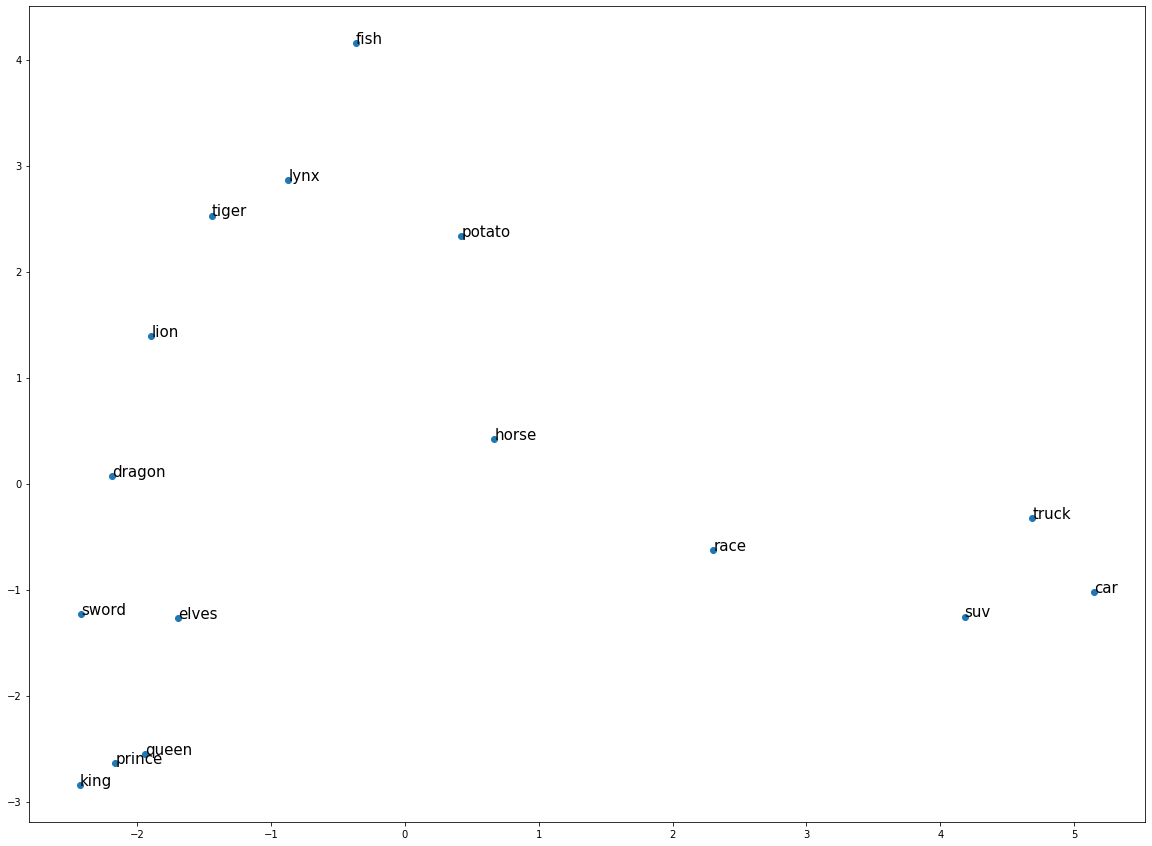

In [ ]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [ ]:
X = [nlp(str(article)).vector for article in data]

In [ ]:
df = pd.DataFrame(X)
df.shape

(401, 300)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.038000,0.199201,-0.080005,-0.098923,0.122248,-0.059507,0.041558,-0.090881,-0.015878,2.063441,-0.151017,0.015669,0.086960,-0.020941,-0.079746,-0.086906,-0.056726,1.121322,-0.146713,-0.089522,-0.048813,0.005552,-0.058596,-0.057463,0.068158,0.042142,-0.066452,-0.067864,0.063992,-0.001818,-0.033014,0.021544,0.001321,0.099160,0.051996,-0.078129,-0.028880,0.048336,-0.013093,-0.078700,...,0.180771,0.154309,0.007251,0.082172,0.040976,-0.142962,-0.008665,-0.000785,0.383816,-0.029259,0.068986,-0.007983,-0.042410,-0.092680,-0.074427,0.013388,-0.014307,0.119966,0.114056,0.179701,0.131000,0.037503,0.003030,0.035802,-0.032854,-0.066189,0.076130,-0.049696,0.139770,-0.038125,-0.223157,0.009893,0.039330,-0.073958,0.012709,-0.063156,-0.031954,-0.075977,-0.028993,0.113036
1,-0.081826,0.108154,-0.102134,-0.068553,0.040693,-0.015332,0.012585,-0.155019,0.042501,2.057056,-0.180053,-0.000803,0.000688,-0.057988,-0.138235,-0.073180,-0.057995,1.202100,-0.173947,-0.045973,0.033461,-0.025882,-0.049736,0.000436,0.029683,0.025063,-0.081706,-0.055194,-0.000049,-0.012588,-0.049473,0.019155,-0.034621,0.091975,0.064146,-0.109703,-0.083920,0.046481,-0.006172,-0.024920,...,0.137394,0.212255,0.018612,0.058669,0.038957,-0.147870,-0.082197,-0.033549,0.436458,-0.063026,0.042408,-0.060400,0.006228,-0.139010,0.046205,-0.027299,-0.018826,0.125858,0.018035,0.073735,0.145347,0.040245,0.079733,0.035818,-0.023162,-0.101774,0.063112,-0.014000,0.120822,-0.102272,-0.264203,0.041438,0.026450,0.046474,-0.014375,-0.007915,-0.009062,-0.072915,0.011543,0.063564
2,-0.004150,0.121971,-0.090053,-0.010790,0.087726,0.008834,-0.024721,-0.082059,-0.026160,2.044691,-0.182530,0.030102,0.065854,-0.060124,-0.100819,-0.047439,-0.061922,1.271475,-0.168229,-0.083587,-0.012914,-0.032910,-0.043517,-0.009934,0.082399,0.027178,-0.083629,-0.028757,0.024098,-0.008836,-0.041005,0.029842,0.011875,0.052912,0.060726,-0.087100,-0.040641,0.067394,-0.008206,-0.080787,...,0.141129,0.127512,0.045034,0.038504,0.058905,-0.162640,-0.039427,-0.021758,0.385212,-0.013894,0.034486,-0.033193,-0.068189,-0.129774,-0.085447,-0.049580,0.021650,0.089141,0.008900,0.103009,0.123480,0.038177,-0.010428,0.000321,-0.035214,-0.133247,0.116622,-0.077198,0.099211,-0.070694,-0.228328,0.029836,0.037157,-0.006453,0.024269,-0.027145,-0.015236,-0.059948,-0.022715,0.101210
3,-0.048318,0.139040,-0.135489,-0.052853,0.051890,0.055285,-0.051661,-0.039645,-0.059681,2.006583,-0.189646,0.012093,0.101179,-0.087471,-0.154128,-0.046997,-0.059592,1.202423,-0.183201,-0.097900,-0.011165,-0.008425,-0.057211,-0.059465,0.033898,0.044398,-0.005847,0.002421,0.060790,-0.053524,0.001718,0.016251,-0.034041,0.063781,0.058237,-0.088857,-0.030138,0.014137,-0.030654,-0.062316,...,0.106343,0.105884,0.018581,0.032421,0.065511,-0.108001,-0.011900,0.020249,0.345795,0.033329,-0.004453,-0.021316,-0.048190,-0.132032,-0.082265,-0.029023,0.034670,0.078810,0.016308,0.122427,0.141345,0.021092,0.011221,-0.030951,-0.042070,-0.092323,0.113681,-0.094785,0.125113,-0.071941,-0.229330,0.047285,0.037654,-0.040470,0.002551,-0.035276,-0.032099,-0.042130,-0.052400,0.087383
4,-0.063061,0.114473,-0.143616,-0.053948,0.038059,0.009353,-0.008567,-0.137446,-0.017979,2.147611,-0.160922,0.016546,0.067799,-0.059768,-0.154261,-0.080516,-0.059955,1.267221,-0.183838,-0.059953,-0.006462,-0.045101,-0.084805,-0.027271,0.058916,0.054026,-0.039898,-0.035888,0.049694,-0.075322,-0.022923,0.049785,0.008469,0.073211,0.045461,-0.086539,-0.068590,0.045296,-0.034254,-0.091680,...,0.146886,0.174166,-0.009910,0.073570,0.015198,-0.049679,-0.017199,0.009449,0.481257,-0.085723,0.108993,-0.039122,-0.038633,-0.133235,-0.018131,0.011315,-0.020333,0.105506,0.003533,0.111729,0.169302,0.054293,0.088442,-0.007278,-0.051970,-0.108813,0.054845,-0

In [ ]:
dist_matrix = pd.DataFrame(cosine_similarity(df))
dist_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.960769,0.977523,0.967945,0.968448,0.978337,0.957344,0.979585,0.967505,0.967937,0.961471,0.963330,0.972967,0.966732,0.973781,0.950393,0.970445,0.968822,0.968582,0.979699,0.971573,0.966295,0.967707,0.970436,0.965476,0.970436,0.980209,0.953950,0.962614,0.958838,0.986053,0.949195,0.969768,0.945775,0.963786,0.963269,0.963608,0.961037,0.979736,0.976503,...,0.964418,0.972769,0.968582,0.968735,0.953526,0.966879,0.971410,0.973050,0.955606,0.977912,0.966755,0.956225,0.972967,0.961356,0.970371,0.970544,0.990060,0.960071,0.959823,0.976477,0.967901,0.965891,0.972975,0.963158,0.960096,0.976111,0.965569,0.961583,0.973524,0.976642,0.978720,0.971731,0.960514,0.984854,0.978630,0.963219,0.973865,0.975688,0.951649,0.971187
1,0.960769,1.000000,0.970312,0.963477,0.982706,0.962582,0.931072,0.963197,0.972869,0.964807,0.976643,0.943679,0.966212,0.956238,0.976220,0.935729,0.969053,0.979527,0.966695,0.967618,0.959937,0.952155,0.952665,0.974569,0.965019,0.974569,0.967511,0.943005,0.965916,0.938265,0.958222,0.942533,0.962349,0.923483,0.957711,0.962235,0.970364,0.962065,0.961892,0.967985,...,0.960364,0.961946,0.966695,0.952946,0.946197,0.971105,0.949375,0.979979,0.943092,0.969896,0.953873,0.948130,0.966212,0.938003,0.955963,0.955617,0.961279,0.962160,0.944666,0.958336,0.969137,0.972441,0.973629,0.952285,0.964185,0.964318,0.956119,0.956707,0.964267,0.961181,0.963724,0.966694,0.950649,0.968827,0.959894,0.975779,0.976860,0.966920,0.930975,0.977116
2,0.977523,0.970312,1.000000,0.983217,0.979829,0.983222,0.951551,0.980260,0.970876,0.974145,0.962688,0.965491,0.973896,0.971854,0.976064,0.950972,0.976188,0.974118,0.971559,0.973661,0.980452,0.968835,0.976880,0.968249,0.970290,0.968249,0.979708,0.965525,0.967964,0.961333,0.978728,0.937891,0.976975,0.940691,0.961333,0.982424,0.976875,0.962606,0.985930,0.978357,...,0.969054,0.976320,0.971559,0.972331,0.957466,0.969235,0.966915,0.982605,0.963242,0.983861,0.970108,0.961945,0.973896,0.956880,0.974715,0.974938,0.970291,0.969377,0.964446,0.977110,0.972723,0.974819,0.984605,0.954212,0.977912,0.977876,0.979711,0.973648,0.972090,0.979174,0.982793,0.982191,0.967583,0.983861,0.978062,0.976116,0.980756,0.976822,0.954391,0.976058
3,0.967945,0.963477,0.983217,1.000000,0.977465,0.975028,0.942083,0.972600,0.960854,0.978189,0.959276,0.957200,0.968043,0.961748,0.974423,0.953818,0.974929,0.967756,0.966320,0.968899,0.977304,0.970950,0.965903,0.965380,0.967818,0.965380,0.976349,0.965363,0.963599,0.955190,0.971351,0.930460,0.975011,0.926740,0.947695,0.979200,0.961394,0.949504,0.974891,0.977069,...,0.969685,0.978360,0.966320,0.970616,0.941253,0.960701,0.953604,0.973311,0.942784,0.974884,0.970202,0.959027,0.968043,0.945944,0.970625,0.973157,0.964309,0.971724,0.966296,0.970768,0.972804,0.971648,0.982965,0.949425,0.976400,0.975894,0.973931,0.962493,0.963985,0.978087,0.972326,0.974834,0.957530,0.980311,0.973117,0.966606,0.971823,0.974656,0.946674,0.965639
4,0.968448,0.982706,0.979829,0.977465,1.000000,0.967520,0.940662,0.969067,0.974324,0.973457,0.970896,0.952701,0.966422,0.960559,0.986383,0.944157,0.974547,0.980704,0.975663,0.974160,0.971980,0.959062,0.963749,0.976720,0.973891,0.976720,0.972563,0.961799,0.978211,0.941015,0.964456,0.945808,0.970224,0.923987,0.947500,0.974030,0.971550,0.956258,0.973185,0.972976,...,0.962665,0.973880,0.975663,0.960935,0.948726,0.972405,0.951846,0.978861,0.945270,0.973638,0.963056,0.955325,0.966422,0.947153,0.967282,0.967606,0.962052,0.964992,0.957028,0.967754,0.979211,0.975300,0.984035,0.947667,0.972858,0.973259,0.969140,0.960926,0.962373,0.973112,0.972226,0.975716,0.960143,0.978977,0.968417,0.977349,0.982808,0.979179,0.933569,0.978439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nn.kneighbors([df.iloc[187]])

(array([[0.        , 0.47266138, 0.57999019, 0.60209174, 0.6123002 ]]),
 array([[187, 142, 335, 249,  86]]))

In [ ]:
data[187]

b'US state acts to stop \'spammers\'\n\nUS state Texas has filed a lawsuit against two men believed to be among the world\'s top five spammers.\n\nIt is seeking millions of dollars in damages in a civil lawsuit filed earlier this week. The Texas attorney general said it started the legal action as messages sent by the alleged spammers broke three laws governing e-mail marketing. The company named in the lawsuit denied any wrongdoing and said it complied with all relevant laws.\n\nThe Texas lawsuit was filed against Ryan Samuel Pitylak, a University ofTexas student, and Mark Stephen Trotter of California. Both are thought to be the top executives in three companies - PayPerAction LLC., Leadplex LLC. and Leadplex Inc - that are suspected of sending out many millions of unwanted e-mail messages. "Illegal spam must be stopped," said Greg Abbott, Texas attorney general announcing the legal action. "Spam is one of the most aggravating and pervasive problems facing consumers today." The attor

In [ ]:
data[142]

b'Anti-spam laws bite spammer hard\n\nThe net\'s self-declared spam king is seeking bankruptcy protection.\n\nScott Richter, the man behind OptInRealBig.com and billions of junk mail messages, said lawsuits had forced the company into Chapter 11. OptInRealBig was fighting several legal battles, most notably against Microsoft, which is pushing for millions of dollars in damages. The company said filing for Chapter 11 would help it try to resolve its legal problems but still keep trading.\n\nListed as the third biggest spammer in the world by junk mail watchdog Spamhaus, OptInRealBig was sued in December 2003 for sending mail messages that violated anti-spam laws. The lawsuit was brought by Microsoft and New York attorney general Eliot Spitzer who alleged that Mr Richter and his accomplices sent billions of spam messages through 514 compromised net addresses in 35 countries. According to Microsoft the messages were sent via net addresses owned by the Kuwait Ministries of Communication an

## Follow Along
### Extract Document Vectors

Let's see how much the quality of our query will work when we try a new embedding model.

Steps:
* Extract Vectors from Each Document
* Search using KNN


In [ ]:
X = [nlp(str(d)).vector for d in data]

In [ ]:
pd.DataFrame(X).shape

## Challenge

You will extract word embeddings from documents using Spacy's pre-trained model in the upcoming module project. 

# Review
For your module project assignment you will create vector representations of indeed.com Data Science job listings. You will then estimate a similarity model to perform searches for job descriptions. Get started with your [module project here](./LS_DS_412_Vector_Representations_Assignment.ipynb)

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf